In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import json
import pprint
from datetime import date
import warnings
warnings.filterwarnings("ignore")

# 1. Historical stock prices

### 1.1 Extended time period

In [40]:
url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":"2020-06-23","StartDateInclusive":"2020-06-21","Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": "INSERT YOUR API KEY",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

Full API response

{'offset': 0,
 'responseStatus': None,
 'results': [{'adjClose': 1451.859985,
              'close': 1451.859985,
              'date': '2020-06-22',
              'high': 1452.75,
              'low': 1423.209961,
              'open': 1429.0,
              'volume': 1542400},
             {'adjClose': 1464.410034,
              'close': 1464.410034,
              'date': '2020-06-23',
              'high': 1475.94104,
              'low': 1445.23999,
              'open': 1455.640015,
              'volume': 1429800},
             {'adjClose': 1431.969971,
              'close': 1431.969971,
              'date': '2020-06-24',
              'high': 1475.420044,
              'low': 1429.75,
              'open': 1461.51001,
              'volume': 1756000},
             {'adjClose': 1441.329956,
              'close': 1441.329956,
              'date': '2020-06-25',
              'high': 1442.900024,
              'low': 1420.0,
              'open': 1429.900024,
 

             open_price  close_price  percent_change
date                                                
2020-06-22  1429.000000  1451.859985        1.599719
2020-06-23  1455.640015  1464.410034        0.602485
2020-06-24  1461.510010  1431.969971       -2.021200
2020-06-25  1429.900024  1441.329956        0.799352
2020-06-26  1431.390015  1359.900024       -4.994445



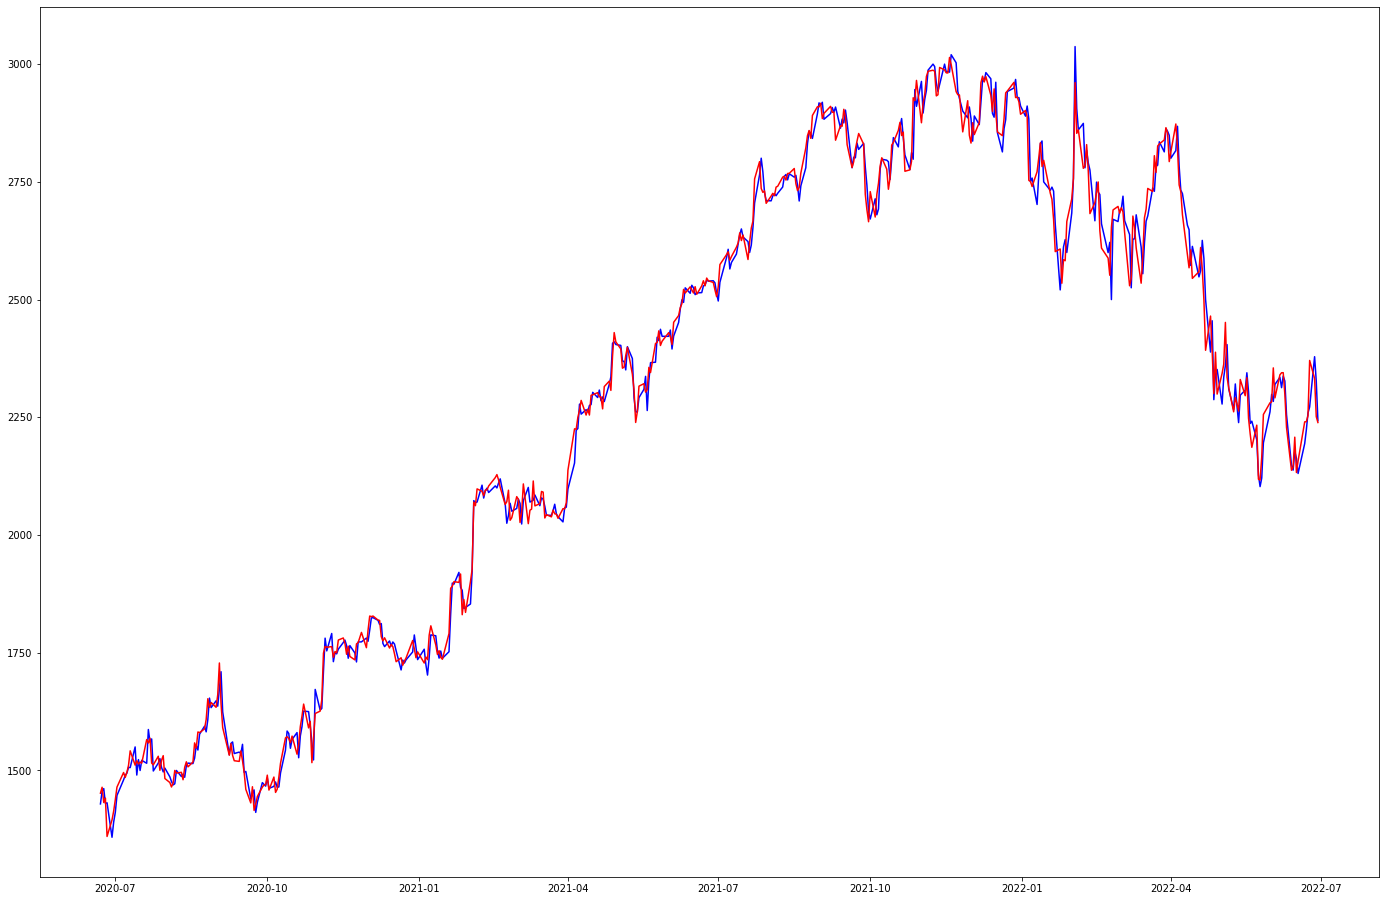

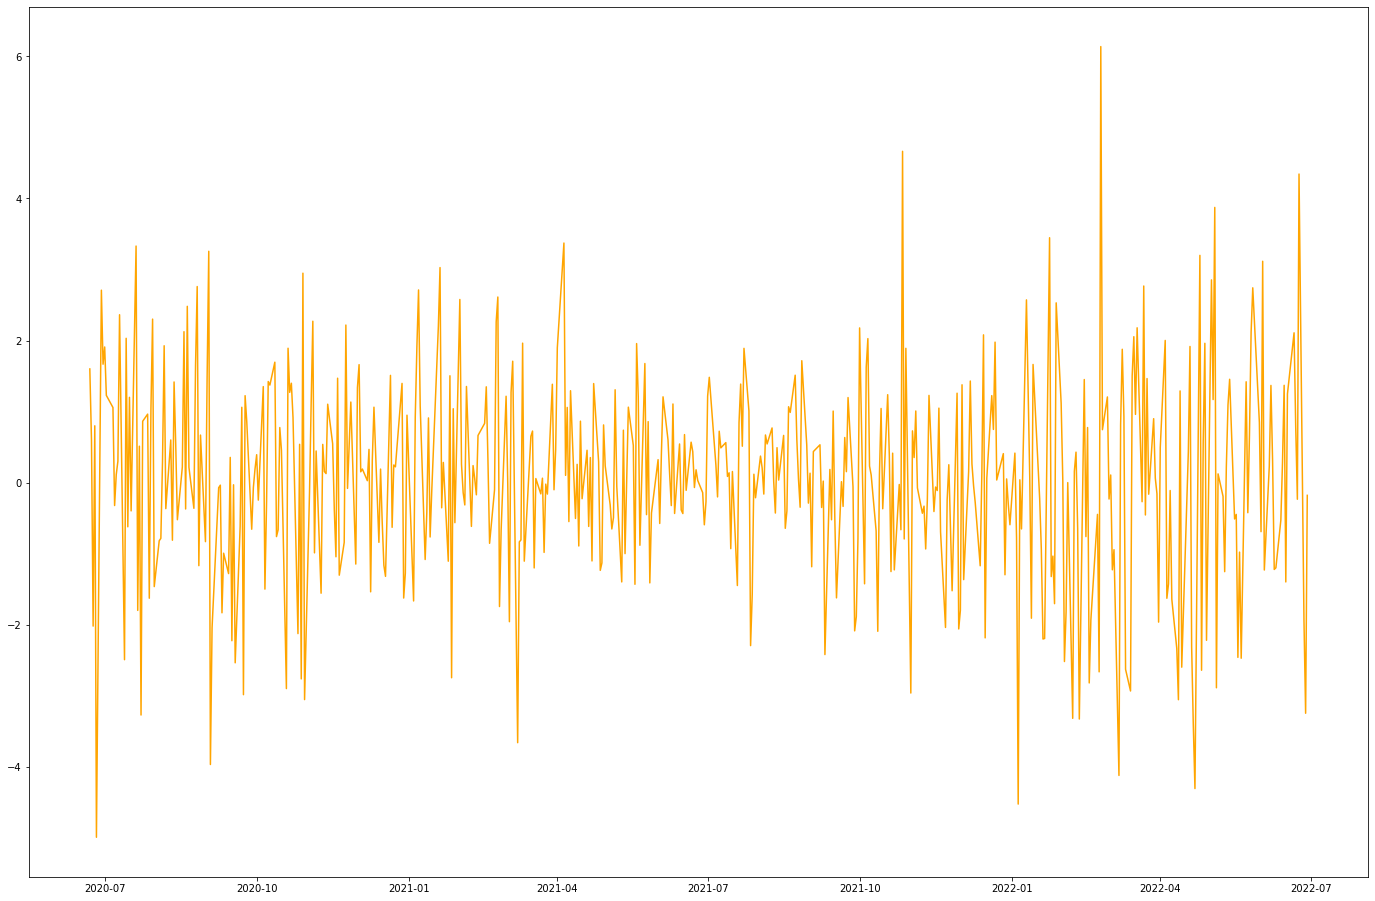

In [56]:
df_stocks = pd.DataFrame()
price_close = []
price_open = []
price_date = []

for result in data['results']: 
  price_close.append(result['close'])
  price_open.append(result['open'])
  price_date.append(result['date'])

df_stocks['date'] = price_date
df_stocks['date'] = list(map(pd.to_datetime,df_stocks['date']))
df_stocks['open_price'] = open_price
df_stocks['close_price'] = close_price
df_stocks['percent_change'] = ((df_stocks['close_price'] - df_stocks['open_price'])/df_stocks['open_price'])*100
df_stocks.index = df_stocks['date']
df_stocks = df_stocks.drop('date',axis=1)

print (df_stocks.head())
print ()
plt.figure(figsize=(24,16))
plt.plot(df_stocks['open_price'],color='blue')
plt.plot(df_stocks['close_price'],color='red')

plt.figure(figsize=(24,16))
plt.plot(df_stocks['percent_change'],color='orange')
plt.show()

### 1.2 Price today

In [29]:
date_today = date.today()

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-prices"

querystring = {"EndDateInclusive":date_today,"StartDateInclusive":date_today,"Symbol":"GOOG","OrderBy":"Ascending"}

headers = {
	"X-RapidAPI-Key": "INSERT YOUR API KEY",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)
print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['results'][0]['close'])

Full API response

{'offset': 0,
 'responseStatus': None,
 'results': [{'adjClose': 2243.564941,
              'close': 2243.564941,
              'date': '2022-06-29',
              'high': 2273.290039,
              'low': 2233.790039,
              'open': 2242.969971,
              'volume': 417523}],
 'total': 1}

Current price: 2243.564941


# 2. Live Stock Metadata

In [30]:
url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-metadata"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": "INSERT YOUR API KEY",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)

print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['result']['regularMarketPrice'])

Full API response

{'responseStatus': None,
 'result': {'ask': 2243.15,
            'askSize': 31,
            'averageDailyVolume10Day': 1625320,
            'averageDailyVolume3Month': 1534816,
            'bid': 2242,
            'bidSize': 9,
            'currency': 'USD',
            'esgPopulated': False,
            'exchange': 'NMS',
            'exchangeDataDelayedBy': 0,
            'exchangeTimezoneName': 'America/New_York',
            'exchangeTimezoneShortName': 'EDT',
            'fiftyDayAverage': 2302.0942,
            'fiftyDayAverageChange': -64.0293,
            'fiftyDayAverageChangePercent': -0.0278135,
            'fiftyTwoWeekHigh': 3042,
            'fiftyTwoWeekHighChange': -803.93506,
            'fiftyTwoWeekHighChangePercent': -0.26427844,
            'fiftyTwoWeekLow': 2044.16,
            'fiftyTwoWeekLowChange': 193.9049,
            'fiftyTwoWeekLowChangePercent': 0.09485799,
            'fiftyTwoWeekRange': '2044.16 - 3042.0',
            'fullExchange

# 3. Live Stock Statistics

In [57]:
import requests

url = "https://yahoofinance-stocks1.p.rapidapi.com/stock-statistics"

querystring = {"Symbol":"GOOG"}

headers = {
	"X-RapidAPI-Key": "INSERT YOUR API KEY",
	"X-RapidAPI-Host": "yahoofinance-stocks1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)
data = json.loads(response.text)

#Printing API text response by first converting it to JSON format
print ("Full API response")
print ()
pprint.pprint(data)
'''
print ()

#Current price is extracted by selecting the closing price for the given day
print ("Current price:",data['results'][0]['close'])
print(response.text)
'''

Full API response

{'responseStatus': None,
 'result': {'currency': 'USD',
            'quarterlyValuationMeasures': [{'label': 'Market Cap (intraday)',
                                            'period': 'Current',
                                            'value': '1530000000000.00'},
                                           {'label': 'Enterprise Value',
                                            'period': 'Current',
                                            'value': '1420000000000.00'},
                                           {'label': 'Trailing P/E',
                                            'period': 'Current',
                                            'value': '21.10'},
                                           {'label': 'Forward P/E',
                                            'period': 'Current',
                                            'value': '20.53'},
                                           {'label': 'PEG Ratio (5 yr '
                               

'\nprint ()\n\n#Current price is extracted by selecting the closing price for the given day\nprint ("Current price:",data[\'results\'][0][\'close\'])\nprint(response.text)\n'